In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
path = "/Users/leoware/PycharmProjects/Bus Simulation/data/sim_2021-09-22_22:17:30.567152/log_15buses_#0__2021-09-22 22:17:30.567981.csv"

df_raw = pd.read_csv(path)
for col in ["object_type", "action", "status"]:
    df_raw[col] = df_raw[col].astype("category")

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20834 entries, 0 to 20833
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   event_id     20834 non-null  int64   
 1   time         20834 non-null  float64 
 2   object_type  20834 non-null  category
 3   object_id    20834 non-null  int64   
 4   action       20834 non-null  category
 5   status       20834 non-null  category
dtypes: category(3), float64(1), int64(2)
memory usage: 549.9 KB


## investigating wait times

In [24]:
dispatched = (df_raw[df_raw["status"] == "DISPATCHED"]
    .rename(columns={"time": "dispatch_time"})
    .drop("status", axis=1))

# just take event_id and time from this one
finished = (df_raw[df_raw["status"] == "FINISHED"][["event_id", "time"]]
    .rename(columns={"time": "finish_time"}))

# merge them back together to get start and end times for every event
# events that were in progress when the sim ended are droped
df = (pd.merge(dispatched, finished, how="left", on="event_id")
            .dropna()
            [["event_id", "action", "object_type", "object_id", "dispatch_time", "finish_time"]])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10831
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   event_id       10000 non-null  int64   
 1   action         10000 non-null  category
 2   object_type    10000 non-null  category
 3   object_id      10000 non-null  int64   
 4   dispatch_time  10000 non-null  float64 
 5   finish_time    10000 non-null  float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 410.5 KB


In [29]:
df[(df['object_type'] == 'Passenger') & (df['object_id'] == 3)]

,event_id,action,object_type,object_id,dispatch_time,finish_time
36,1036,JOIN_QUEUE,Passenger,3,0.288121,0.288121
106,1106,EMBARK,Passenger,3,1.953043,1.953043
276,1276,DISEMBARK,Passenger,3,4.167595,4.221734


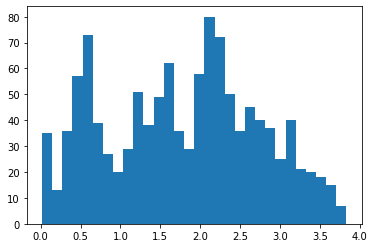

In [47]:
df['duration'] = df['finish_time'] - df['dispatch_time']
plt.hist(df[
    (df["action"] == "DISEMBARK") &
    (df["object_type"] == "Passenger")
    ]['duration'], bins=30)
plt.show()